# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

from sklearn import datasets
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
np.random.seed(0)
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Import DataSet

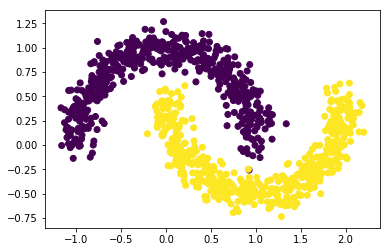

In [ ]:
data, labels = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=0)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

# Splitting the dataset into training and testing

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(data, labels)

X_training = np.array(X[0:600,])
X_testing  = np.array(X[600:,])
y1_training = y[0:600]
y1_testing  = y[600:]

print('X_training: ', X_training.shape)
print('X_testing', X_testing.shape)

X_training:  (600, 2)
X_testing (400, 2)


In [ ]:
n_labels = 2

y_label = np.eye(2)
y_training = []
y_testing  = []

for i in range(600):
    if y1_training[i] == 0:
        y_training.append(y_label[0])
    else:
        y_training.append(y_label[1])
    
for i in range(400):
    if y1_testing[i] == 0:
        y_testing.append(y_label[0])
    else:
        y_testing.append(y_label[1])
        
y_training = np.array(y_training)
y_testing  = np.array(y_testing)

# Feed-forward neural network model

In [ ]:
learning_rate = 0.015
training_epochs = 50
batch_size = 50
display_step = 100

n_features1 = 2
n_features2 = 2

n_labels = 2 # Recall that we need to do one-hot coding

X = tf.placeholder(tf.float32, [None, n_features1]) # Input x1, x2
Y = tf.placeholder(tf.float32, [None, n_labels]) # Output labels

W1 = tf.Variable(tf.truncated_normal([n_features1, n_features2]), name='weights1') # w1, w2
b1 = tf.Variable(tf.constant(value=1, dtype=tf.float32, shape=[2]), name='bias1')   # bias
W2 = tf.Variable(tf.truncated_normal([n_features2, n_labels]), name='weights2') # w1, w2
b2 = tf.Variable(tf.constant(value=1, dtype=tf.float32, shape=[n_labels]), name='bias2')   # bias

hidden_1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Y_       = tf.nn.softmax(tf.matmul(hidden_1, W2) + b2)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=Y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Y_, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Calcuating accuracy 

In [ ]:
train_accuracy_all = []
batch_all = []
batch_loss_all = []
epoch_loss_all = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        overall_loss = 0.
        for i in range(0, len(X_training), batch_size):
            batch_xs = X_training[i : (i + batch_size)]
            batch_ys = y_training[i : (i + batch_size)]
            
            _, batch_loss = sess.run([train_step, cross_entropy], feed_dict={X: batch_xs, Y: batch_ys})
            
            overall_loss += batch_loss/batch_size
            
            batch_all.append(i)
            
            batch_loss_all.append(batch_loss/batch_size)
    
            print('Batch %d, Loss: %g' % (i, batch_loss))
        
        print("Epoch:", '%04d' % (epoch+1), "Loss=", "{:.9f}".format(overall_loss))
        epoch_loss_all.append(overall_loss/len(X_training))
        print("***********************")

    a = sess.run([accuracy], feed_dict={X: X_testing, Y: y_testing})
    train_accuracy_all.append(a)
    print("Accuracy:", a)   

Batch 0, Loss: 0.682459
Batch 50, Loss: 0.5603
Batch 100, Loss: 0.655511
Batch 150, Loss: 0.623841
Batch 200, Loss: 0.593111
Batch 250, Loss: 0.575746
Batch 300, Loss: 0.549698
Batch 350, Loss: 0.524883
Batch 400, Loss: 0.641518
Batch 450, Loss: 0.585506
Batch 500, Loss: 0.603097
Batch 550, Loss: 0.522695
Epoch: 0001 Loss= 0.142367309
***********************
Batch 0, Loss: 0.680144
Batch 50, Loss: 0.559167
Batch 100, Loss: 0.653762
Batch 150, Loss: 0.622391
Batch 200, Loss: 0.591679
Batch 250, Loss: 0.574509
Batch 300, Loss: 0.548606
Batch 350, Loss: 0.523863
Batch 400, Loss: 0.639543
Batch 450, Loss: 0.58425
Batch 500, Loss: 0.601468
Batch 550, Loss: 0.521394
Epoch: 0002 Loss= 0.142015541
***********************
Batch 0, Loss: 0.677812
Batch 50, Loss: 0.558026
Batch 100, Loss: 0.651997
Batch 150, Loss: 0.620928
Batch 200, Loss: 0.590241
Batch 250, Loss: 0.573267
Batch 300, Loss: 0.547511
Batch 350, Loss: 0.522841
Batch 400, Loss: 0.637562
Batch 450, Loss: 0.582994
Batch 500, Loss: 0.5

Batch 150, Loss: 0.572129
Batch 200, Loss: 0.546163
Batch 250, Loss: 0.533519
Batch 300, Loss: 0.514467
Batch 350, Loss: 0.490779
Batch 400, Loss: 0.57348
Batch 450, Loss: 0.544296
Batch 500, Loss: 0.548125
Batch 550, Loss: 0.479009
Epoch: 0038 Loss= 0.130426559
***********************
Batch 0, Loss: 0.600962
Batch 50, Loss: 0.522096
Batch 100, Loss: 0.592116
Batch 150, Loss: 0.570876
Batch 200, Loss: 0.545128
Batch 250, Loss: 0.532538
Batch 300, Loss: 0.513691
Batch 350, Loss: 0.49
Batch 400, Loss: 0.571871
Batch 450, Loss: 0.543395
Batch 500, Loss: 0.546823
Batch 550, Loss: 0.478024
Epoch: 0039 Loss= 0.130150399
***********************
Batch 0, Loss: 0.599114
Batch 50, Loss: 0.521287
Batch 100, Loss: 0.590623
Batch 150, Loss: 0.569633
Batch 200, Loss: 0.544106
Batch 250, Loss: 0.531567
Batch 300, Loss: 0.512925
Batch 350, Loss: 0.48923
Batch 400, Loss: 0.570276
Batch 450, Loss: 0.542507
Batch 500, Loss: 0.545533
Batch 550, Loss: 0.477056
Epoch: 0040 Loss= 0.129877142
****************

# plotting

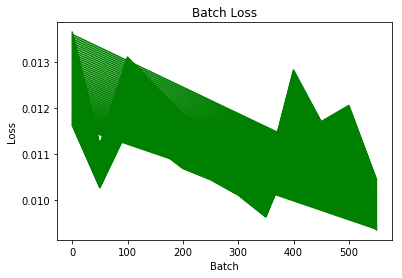

In [ ]:
#costs= train_neural_network(data)
# fig, ax = plt.subplots()
# ax.plot(costs)
# ax.set_ylim(0, ax.get_ylim()[1])
# ax.set_ylabel('Cost')
# ax.set_xlabel('Iteration #');

#train_accuracy_all = np.array(train_accuracy_all)
#train_accuracy_all = np.squeeze(train_accuracy_all)

batch_all = np.array(batch_all)
batch_all = np.squeeze(batch_all)

batch_loss_all = np.array(batch_loss_all)
batch_loss_all = np.squeeze(batch_loss_all)

epoch_loss_all = np.array(epoch_loss_all)
epoch_loss_all = np.squeeze(epoch_loss_all)


#for i in range(0, len(theta_normeq_all)):
#    epoch1.append(theta_normeq_all[i])

    
#x1, = plt.plot(batch_all, epoch_loss_all, "b-", label="Epoch") 
x2, = plt.plot(batch_all, batch_loss_all, "g-", label="Training Accuracy") 


plt.title('Batch Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
#plt.legend(handles=[x1], loc=1)
   


# Plotting Epoch loss

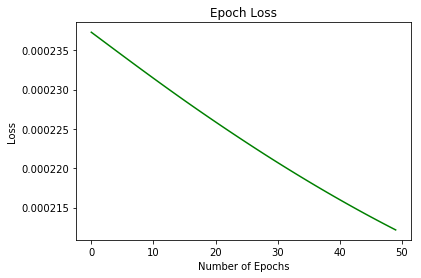

In [ ]:


#overall_batch_loss = np.array(overall_batch_loss)
#overall_batch_loss = np.squeeze(overall_batch_loss)



epoch_loss_all = np.array(epoch_loss_all)

x2, = plt.plot(range(training_epochs), epoch_loss_all, "g-", label="Epoch Loss") 
plt.title('Epoch Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

# ROC Curve

In [ ]:


# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_training, y_training).decision_function(X_testing)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testing[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_testing.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ROC Plot

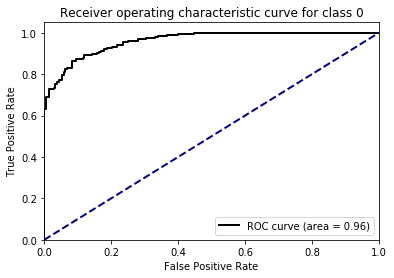

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for class 0')
plt.legend(loc="lower right")
plt.show()

# ROC 

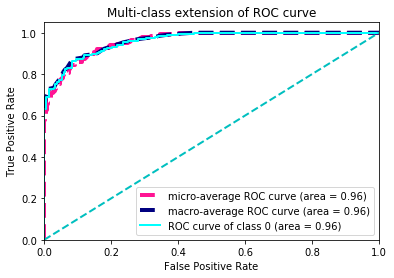

In [ ]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='--', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='--', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'c--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class extension of ROC curve')
plt.legend(loc="lower right")
plt.show()